In [1]:
import copy
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append("..")
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
def plot_big_token_attack(
    file="../_dump/theory_attacks/theory_attack_big_token.csv",
    saveto = "dump/theory_attack_repeat_token.png",
    tfs = 14,
    lfs = 12,
):
    df = pd.read_csv(file)
    vals_d64 = np.array(df[df["num_vars"] == 64].states_acc)
    vals_d56 = np.array(df[df["num_vars"] == 56].states_acc)
    vals_d48 = np.array(df[df["num_vars"] == 48].states_acc)
    vals_d32 = np.array(df[df["num_vars"] == 32].states_acc)

    # -1.000, -0.875, ..., 1.000
    kappa_pows = np.array([-1 + 0.125*k for k in range(17)])
    
    plt.clf()
    plt.plot(kappa_pows, vals_d32, label="d=32, n=64")
    plt.plot(kappa_pows, vals_d48, label="d=48, n=96")
    plt.plot(kappa_pows, vals_d56, label="d=56, n=112")
    plt.plot(kappa_pows, vals_d64, label="d=64, n=128")

    plt.title("Big Token Attack", fontsize=tfs)
    plt.legend(loc="lower right", fontsize=lfs)
    plt.ylabel("Attack Success Rate", fontsize=lfs)
    plt.xlabel("kappa (log10)", fontsize=lfs)
    
    plt.savefig(saveto, bbox_inches="tight")
    return plt

In [3]:
def plot_repeat_token_attack(
    file = "../_dump/theory_attacks/theory_attack_repeat_token.csv",
    saveto = "dump/theory_attack_repeat_token.png",
    tfs = 14,
    lfs = 12,
):
    df = pd.read_csv(file)
    vals_d64 = np.array(df[df["num_vars"] == 64].states_acc)
    vals_d56 = np.array(df[df["num_vars"] == 56].states_acc)
    vals_d48 = np.array(df[df["num_vars"] == 48].states_acc)
    vals_d32 = np.array(df[df["num_vars"] == 32].states_acc)

    # -1.000, -0.875, ..., 1.000
    repeat_pows = np.array([0,1,2,3,4,5,6,7,8,9])
    
    plt.clf()
    plt.plot(repeat_pows, vals_d32, label="d=32, n=64")
    plt.plot(repeat_pows, vals_d48, label="d=48, n=96")
    plt.plot(repeat_pows, vals_d56, label="d=56, n=112")
    plt.plot(repeat_pows, vals_d64, label="d=64, n=128")

    plt.title("Repeat Token Attack", fontsize=tfs)
    plt.legend(loc="upper left", fontsize=lfs)
    plt.ylabel("Attack Success Rate", fontsize=lfs)
    plt.xlabel("Num Repeats (log2)", fontsize=lfs)
    
    plt.savefig(saveto, bbox_inches="tight")
    return plt

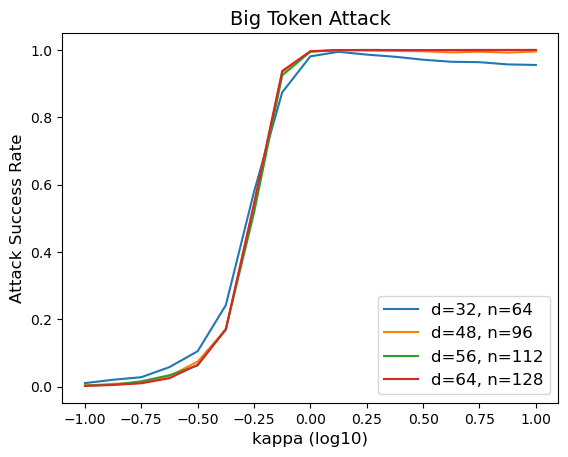

In [4]:
plt = plot_big_token_attack();

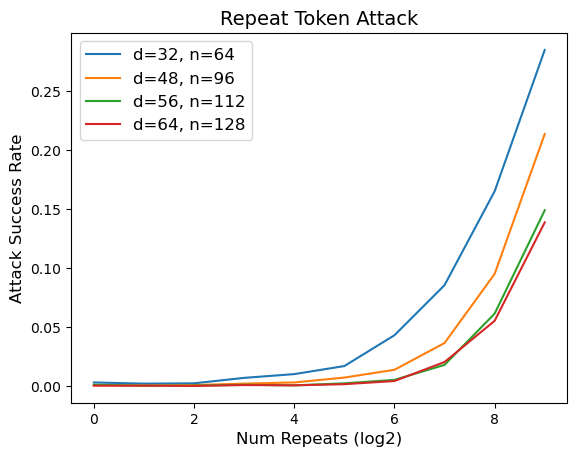

In [5]:
plt = plot_repeat_token_attack();